In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize, Bounds

In [4]:
codes = list() # corporation codes here 
samsung = "005930.KS"
naver = "035420.KS"
hynix = "000660.KS"
kakao = "035720.KS"
dosan = "034020.Ks"

In [21]:
samsung_close = pd.DataFrame(yf.download(samsung, "2021-12-01", "2022-03-18")["Close"])
naver_close = pd.DataFrame(yf.download(naver, "2021-12-01", "2022-03-18")["Close"])
hynix_close = pd.DataFrame(yf.download(hynix, "2021-12-01", "2022-03-18")["Close"])
kakao_close = pd.DataFrame(yf.download(kakao, "2021-12-01", "2022-03-18")["Close"])
dosan_close = pd.DataFrame(yf.download(dosan, "2021-12-01", "2022-03-18")["Close"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
samsung_close.set_index("date", inplace=True)

AttributeError: 'Series' object has no attribute 'set_index'

In [74]:
stock_df = samsung_close.rename(columns={"Close":"Samsung"})

In [80]:
stock_df["Naver"] = naver_close["Close"]
stock_df["Hynix"] = hynix_close["Close"]
stock_df["Dosan"] = dosan_close["Close"]
stock_df["Kakao"] = kakao_close["Close"]


In [86]:
stock_df

,Samsung,Naver,Hynix,Dosan,Kakao
Date,,,,,
2021-12-01,74400.0,390000.0,116500.0,19900.0,122500.0
2021-12-02,75800.0,398500.0,120000.0,19850.0,122500.0
2021-12-03,75600.0,402000.0,118000.0,20150.0,123500.0
2021-12-06,76300.0,392000.0,118500.0,20750.0,121000.0
2021-12-07,77400.0,391000.0,121500.0,20750.0,120500.0
...,...,...,...,...,...
2022-03-11,70000.0,304500.0,118000.0,20800.0,92100.0
2022-03-14,70200.0,329000.0,116000.0,23350.0,103500.0
2022-03-15,70200.0,329000.0,116000.0,23350.0,103500.0


In [88]:
stock_df.mean()

Samsung     75268.571429
Naver      345350.000000
Hynix      124071.428571
Dosan       19731.410938
Kakao      101010.000000
dtype: float64

In [87]:
stock_df - stock_df.mean()

,Samsung,Naver,Hynix,Dosan,Kakao
Date,,,,,
2021-12-01,-868.571429,44650.0,-7571.428571,168.589062,21490.0
2021-12-02,531.428571,53150.0,-4071.428571,118.589062,21490.0
2021-12-03,331.428571,56650.0,-6071.428571,418.589062,22490.0
2021-12-06,1031.428571,46650.0,-5571.428571,1018.589062,19990.0
2021-12-07,2131.428571,45650.0,-2571.428571,1018.589062,19490.0
...,...,...,...,...,...
2022-03-11,-5268.571429,-40850.0,-6071.428571,1068.589062,-8910.0
2022-03-14,-5068.571429,-16350.0,-8071.428571,3618.589062,2490.0
2022-03-15,-5068.571429,-16350.0,-8071.428571,3618.589062,2490.0


In [82]:
stock_cov = stock_df.cov() 
stock_cov

,Samsung,Naver,Hynix,Dosan,Kakao
Samsung,8.884795e+06,6.674812e+07,6.478364e+06,4.093022e+05,2.011293e+07
Naver,6.674812e+07,9.588141e+08,-7.068841e+06,2.412321e+07,3.679754e+08
Hynix,6.478364e+06,-7.068841e+06,2.423395e+07,-3.252411e+06,-1.135145e+07
Dosan,4.093022e+05,2.412321e+07,-3.252411e+06,3.387324e+06,1.436364e+07
Kakao,2.011293e+07,3.679754e+08,-1.135145e+07,1.436364e+07,1.601766e+08


In [83]:
stock_cov.shape
dim = len(stock_df)
dim

70

In [84]:
dim = len(stock_cov)
var = lambda x: np.dot(np.dot(x, stock_cov), x)
cons = {"type":"eq", 'fun': lambda x: np.sum(x) - 1}
x0 = np.ones(dim)*(1/dim)
globalminport = minimize(var, x0, constraints=cons)
print(globalminport)

     fun: 1162439.7855805194
     jac: array([2324879.      , 2324879.015625, 2324879.015625, 2324879.015625,
       2324879.03125 ])
 message: 'Optimization terminated successfully'
    nfev: 73
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.44219852, -0.04608398, -0.00127725,  0.60160016,  0.00356255])


In [108]:
def mini(stock_df):
    stock_cov = stock_df.pct_change().cov() * 250
    dim = len(stock_cov)
    var = lambda x: np.dot(np.dot(x, stock_cov), x)
    cons = {"type":"eq", 'fun': lambda x: np.sum(x) - 1}
    x0 = np.ones(dim)*(1/dim)
    globalminport = minimize(var, x0, constraints=cons)
    print(globalminport)

In [241]:
stock_df_normal = stock_df - stock_df.mean()
stock_df_normal = np.log(1 + stock_df.pct_change())
stock_df_normal

,Samsung,Naver,Hynix,Dosan,Kakao
Date,,,,,
2021-12-01,NaN,NaN,NaN,NaN,NaN
2021-12-02,0.018642,0.021561,0.029600,-0.002516,0.000000
2021-12-03,-0.002642,0.008745,-0.016807,0.015000,0.008130
2021-12-06,0.009217,-0.025190,0.004228,0.029342,-0.020451
2021-12-07,0.014314,-0.002554,0.025001,0.000000,-0.004141
...,...,...,...,...,...
2022-03-11,0.007168,0.000000,0.000000,0.000000,0.000000
2022-03-14,0.002853,0.077387,-0.017094,0.115644,0.116697
2022-03-15,0.000000,0.000000,0.000000,0.000000,0.000000


In [122]:
mini(stock_df=stock_df)

     fun: 0.03379135014907808
     jac: array([0.06760756, 0.06748839, 0.06769009, 0.06742587, 0.06751056])
 message: 'Optimization terminated successfully'
    nfev: 96
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 1.22003577, -0.12878257, -0.22907114,  0.09359769,  0.04422024])


In [119]:
import matplotlib.pyplot as plt
x = np.random.rand(100, 5)
sic = lambda x:np.dot(np.dot(stock_cov, x), x)
y =list(map(sic, x))


In [150]:
# def yield(w, mu):
    # res = list()
    # for i in w:
        # res.append(np.dot(mu, i))
        
    # return res

# class portfolio:
    # def __init__(self, stock_dataframe:pd.dataframe): 
        # self.st_df = stock_dataframe
        # self.cov_var = lambda x: np.dot(np.dot(self.st_df, x), x) -> x is weigth arrays of each stocks
        
    # def minVAR_portfolio(self): -> None
        # stock_cov = self.st_df.cov()
        # init_x = np.ones(len(stock_cov))*(1/len(stock_cov)) -> initial weight of stocks (1 / length of stock_cov)
        # cons = {"type":"eq", "fun": lambda x: np.sum(x) - 1} -> must think again; sum(x) - 1 = 0 ? maybe multifunc is available
            # must add bound for x // 0 <= x <= 1
        # res = minimize(self.cov_var, init_x, constraints=cons) -> minimulizing function
        
        # return res
    
    # def plotting(self): -> x:list, y:list for plt(x, y)
        # ran = list()
        # for i in range(100):
            # temp = np.random.rand(5)
            # ran.append(temp/temp.sum())
        # mu = self.st_df.pct_change().mean()
        # plt_var = list(map(self.cov_var, ran))
        # plt_yield = yield(ran, mu)
        
        # return plt_var, plt_yield


In [238]:
def expecting_yield(w, mu):
    res = list()
    for i in w:
        res.append(np.dot(mu, i))
    return res

class portpolio:
    def __init__(self, stock_dataframe):
        self.st_df = stock_dataframe
        self.st_cv = stock_dataframe.cov() * 200
        self.cov_var = lambda x: np.dot(np.dot(self.st_cv, x), x)
        
    def minVAR(self):
        init_x = np.ones(len(self.st_cv))*(1/len(self.st_cv))
        cons = {"type" : "eq", 
                "fun": lambda x : np.sum(x)-1}
        bnd = Bounds(np.zeros(len(self.st_cv)), np.ones(len(self.st_cv)))
        res = minimize(fun=self.cov_var, 
                       x0=init_x, 
                       method='SLSQP',
                       bounds = bnd, 
                       constraints=cons)
        return res
    
    def plotting(self):
        ran = list()
        for _ in range(10000):
            temp = np.random.rand(5)
            ran.append(temp/temp.sum())
        mu = self.st_df.mean()
        plt_var = list(map(self.cov_var, ran))
        plt_yield = expecting_yield(ran, mu)
        
        return plt_var, plt_yield, mu

     fun: 0.030569282145415252
     jac: array([0.06111464, 0.07283541, 0.08476034, 0.06133934, 0.06572004])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([8.93518699e-01, 3.29597460e-17, 0.00000000e+00, 1.06481301e-01,
       7.80625564e-18])


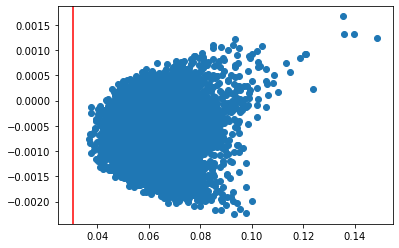

In [239]:
a = portpolio(stock_df_normal)
res = a.minVAR()
print(res)
x, y, mu = a.plotting()
plt.scatter(x, y)
plt.axvline(x=res.fun, color='r')

In [196]:
from pandas_datareader import data
from datetime import datetime

In [195]:
df = data.DataReader("^KS11", "yahoo")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,2160.570068,2151.510010,2160.320068,2157.010010,264900,2157.010010
2017-03-21,2181.989990,2160.250000,2162.949951,2178.379883,303900,2178.379883
2017-03-22,2170.000000,2158.959961,2159.969971,2168.300049,394400,2168.300049
2017-03-23,2182.419922,2170.560059,2174.090088,2172.719971,358600,2172.719971
2017-03-24,2179.340088,2163.340088,2171.360107,2168.949951,358700,2168.949951
...,...,...,...,...,...,...
2022-03-14,2661.760010,2633.310059,2654.929932,2645.649902,635900,2645.649902
2022-03-15,2641.969971,2615.080078,2630.310059,2621.530029,603700,2621.530029
2022-03-16,2659.899902,2630.030029,2649.850098,2659.229980,736000,2659.229980


Text(0.5, 1.0, 'KOSPI 2017-03-20 to 2022-03-18')

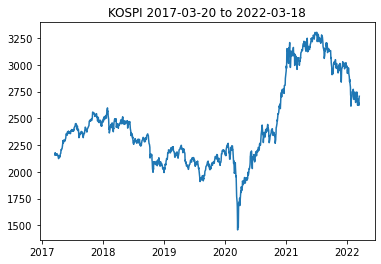

In [198]:
plt.plot(df["Adj Close"])
plt.title("KOSPI 2017-03-20 to 2022-03-18")

In [203]:
df.var()


High         1.591321e+05
Low          1.560019e+05
Open         1.577588e+05
Close        1.573160e+05
Volume       1.433962e+11
Adj Close    1.573160e+05
dtype: float64